In [282]:
import matplotlib.pyplot as plt
import numpy as np

In [283]:
np.set_printoptions(precision=8)

### $\beta$-scaling (but the original estimator)

In [284]:
data = np.loadtxt("/Users/ecasiano/Xcode/pimc/pimc/Big/2D_32_1024_20_16.666667_1.000000_4.000000_1000_SWAP_42.dat")
np.shape(data)
data[:4]
data.shape[0]

135

In [285]:
P = np.sum(data,axis=0)

In [286]:
pj = np.zeros(data.shape)

In [287]:
for i in range(data.shape[1]):
    pj[:,i]=P[i]

In [288]:
N_rows = data.shape[0]
pj_bar = (pj-data)/(N_rows-1)

In [289]:
D = 2
l_max = 20
m_max = l_max**D
S = np.zeros(m_max+1)
S_err = np.zeros(m_max+1)
for m in range(m_max+1):
    S_jacknifed = -np.log(pj_bar[:,m]/pj_bar[:,0])
    S[m] = np.mean(S_jacknifed)
    S_err[m] = np.sqrt(N_rows-1)*np.std(S_jacknifed)

### Entanglement Boundary Law

In [290]:
perimeters = np.zeros(l_max+1)
widths = np.zeros(l_max+1)
for width in range(l_max+1):
    perimeters[width] = 2*(width+l_max)
    widths[width] = width
perimeters[0] = 0
perimeters = perimeters.astype(int)
perimeters

boundary_sizes = np.arange(0,l_max+1,1)
boundary_sizes,(widths*l_max).astype(int)
widths = widths.astype(int)
widths_indices = widths*l_max
widths_indices

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400])

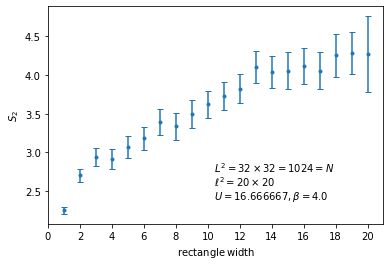

In [291]:
fig,ax1 = plt.subplots()
plt.errorbar(widths[1:], S[widths_indices][1:], yerr=S_err[widths_indices][1:], fmt='.', capsize=3);
# plt.errorbar(widths.astype(int), S[boundary_sizes], yerr=S_err[boundary_sizes], fmt='.', capsize=3);
# ax1.plot(betas,S2s,color='lightskyblue')
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\rm{rectangle \, width}$')
# # ax1.axhline(K_exact,color='#cccccc',zorder=-10)
ax1.annotate(r"$L^2 =32 \times 32 = 1024 = N$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$\ell^2=20 \times 20$",(0.55,0.30),xycoords='figure fraction')
ax1.annotate(r"$U=16.666667,\beta=4.0$",(0.55,0.25),xycoords='figure fraction')
# # ax1.annotate(r'$K_{exact}=%.4f$'%(K_exact),(0.40,0.75),xycoords='figure fraction')
# ax1.annotate(r'$\langle K \rangle = %.4f \pm %.4f$'%(K_pimc,error),(0.40,0.70),xycoords='figure fraction')
# ax1.tick_params(axis='both',direction='in')
ax1.set_xticks(widths[::2])
plt.savefig("boundary_law_scaling.pdf")

In [292]:
for m,w in enumerate(widths_indices):
    print(f"S(m={m:02d}) = {S[w]:0.6f} +/- {S_err[w]:0.6f}")

S(m=00) = 0.000000 +/- 0.000000
S(m=01) = 2.250393 +/- 0.046430
S(m=02) = 2.700762 +/- 0.082338
S(m=03) = 2.939145 +/- 0.118762
S(m=04) = 2.917658 +/- 0.127417
S(m=05) = 3.066223 +/- 0.138955
S(m=06) = 3.179490 +/- 0.144957
S(m=07) = 3.390917 +/- 0.164901
S(m=08) = 3.335468 +/- 0.170888
S(m=09) = 3.494131 +/- 0.177334
S(m=10) = 3.619492 +/- 0.179224
S(m=11) = 3.727149 +/- 0.180606
S(m=12) = 3.824219 +/- 0.185827
S(m=13) = 4.101102 +/- 0.207553
S(m=14) = 4.042233 +/- 0.204151
S(m=15) = 4.056463 +/- 0.236306
S(m=16) = 4.117083 +/- 0.232952
S(m=17) = 4.056472 +/- 0.240080
S(m=18) = 4.255804 +/- 0.276205
S(m=19) = 4.287054 +/- 0.271341
S(m=20) = 4.270798 +/- 0.489021
